# Convolutional Neural Networks

Heute trainieren wir ein Convolutional Neural Network

1. Stellen Sie sicher, dass Sie in Colab auf der GPU trainieren. Hierfür gehen Sie auf Runtime -> Change Runtime Type -> Wählen Sie bei Hardware accelerator GPU aus
2. Die Daten sind bereits für Sie geladen und Sie können sich auf das CNN konzentrieren
3. Schauen Sie sich den bereits bestehenden Code and und verstehen Sie seinen Zweck 
4. Bauen Sie ein Convolutional Neural Network mit der Hilfe von Keras und trainieren Sie es.
5. Vergleichen Sie Ihr Ergebnis mit https://medmnist.com/#Benchmarking (PathMNIST)

# Dataset PathMNIST 
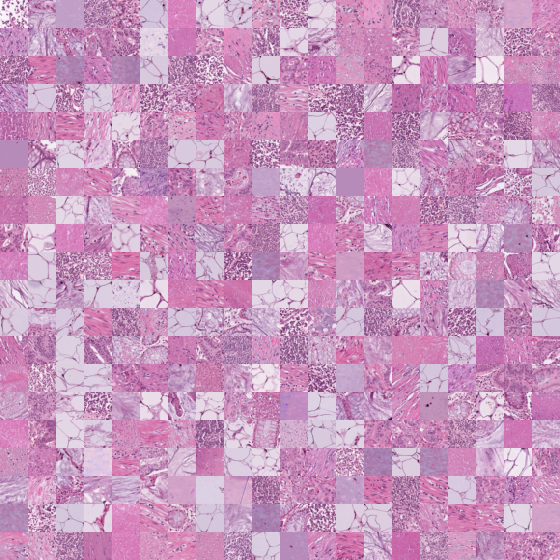
- Number of datapoints: 89996
- Task: multi-class
- Number of channels: 3
- Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
- License: CC BY 4.0

## Labels 

- 0 : adipose
- 1 : background
- 2 : debris
- 3 : lymphocytes
- 4 : mucus
- 5 : smooth muscle
- 6 : normal colon mucosa
- 7 : cancer-associated stroma
- 8 : colorectal adenocarcinoma epithelium



## Description
A dataset based on a prior study for predicting survival from colorectal cancer histology slides, which provides a dataset NCT-CRC-HE-100K of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset CRC-VAL-HE-7K of 7,180 image patches from a different clinical center. 9 types of tissues are involved, resulting a multi-class classification task. We resize the source images of 3 x 224 x 224 into 3 x 28 x 28, and split NCT-CRC-HE-100K into training and valiation set with a ratio of 9:1.


In [ ]:
!wget -nc https://zenodo.org/record/6496656/files/pathmnist.npz?download=1

In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
path_mnist = np.load("pathmnist.npz?download=1")
files = path_mnist.files

X_train = path_mnist["train_images"]
X_valid = path_mnist["val_images"]
X_test = path_mnist["test_images"]

y_train = path_mnist["train_labels"]
y_valid = path_mnist["val_labels"]
y_test = path_mnist["test_labels"]

In [ ]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor="loss", patience=3)

In [ ]:
model = keras.models.Sequential(
    [
        # Todo
    ]
)

model.summary()

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"]
)
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_valid, y_valid),
    callbacks=[callback],
)
score = model.evaluate(X_test, y_test)

In [ ]:
print(f"The accuracy is {score[1]}")